# S2 data visualization
Let's dive into Sentinel-2 data processing! We are going to find some products, read the raster data sets and visualise the tile in true or false colors. Moreover we are going to compute the NBR and the NDSI indexes to detect changes in the vegetation and in the snow coverage, respectively, over the tile. <br>
👇👇👇<br>
**Requirements:**
- `rasterio 1.1.1`
- `opencv-python 4.2.0.32`
- `numpy 1.18.1`
- `matplotlib 3.1.3`
- `seaborn 0.10.0`
- `holoviews 1.12.7`
- `tqdm 4.42.1`
- `ipywidgets 7.5.1`

In [1]:
import os, sys
sys.path.append(os.path.join(os.path.expanduser("~"),"Trials/modules"))
import qm
import data_processing_S2 as dp

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W

You can choose to work with local files or using the Advanced API. Functions in this tutorial can manage both choices independently and automatically, but only if product of interest are provided. <br>
### Using the Advanced API (ENS)
All you need in this case is a list called `list_remote.txt` containing the position of products in the remote file system. Note that this list is automatically provided by the `SEARCH.ipynb` trial notebook aimed at facilitating the data access. By choosing this option, products are found via ENS at their pseudopath, accessed and processed in situ. <br>
### Using OData API
Alternatively you can load a custom list called `list_local.txt` containing the products you have downloaded in the `local_files` folder. To do that, you can use the `download` function provided in the `qm` module, which will download and save items via your own Jupyter Notebook using OData protocol. Follow the example provided below or check out `DISCOVER_ONDA.ipynb`. <br>
👇 To download a product of interest run the cell below and find out the item in the 📁`local_files` folder placed in your root workspace. The 📄`list_local.txt` file will be updated in this working directory with the new downloaded item authomatically.

In [ ]:
username = "gaia.cipolletta@inaf.it"; password = "Gaia1992@ondadias" # ONDA auth required 
product = "S2A_MSIL2A_20191215T110441_N0213_R094_T30SVG_20191215T122756.zip" # product name here
r = qm.download(product,username,password) # download in the destination folder 

## True RGB stack

Select products from the dataframe you queried via SEARCH notebook and load an RGB stack of the tile. The `image` function will open and read raster bands B02 (B), B03 (G) and B04 (R), showing the stacked RGB image. Coordinates are read from the raster data sets, and dumped into a temporary file called 📄`polygon.json`. The polygon is updated every time you compute a new RGB stack.<br>
⚠️ RGB visualisation is a memory consuming assignment thus only one stack per time is supported here. Select an item from your list via the widget below.

In [8]:
mission,button,l1 = dp.choose(dp.products("list_remote.txt"))
def inputs(b):
    l1.name = mission.value
    print("%s"%(l1.name))
button.on_click(inputs)

Dropdown(description='Product:', layout=Layout(width='95%'), options=('/mnt/Copernicus/OPTICAL/LEVEL-2A/2019/1…

Button(description='CLICK to submit', style=ButtonStyle())

Access to files:

/mnt/Copernicus/OPTICAL/LEVEL-2A/2019/12/15/S2A_MSIL2A_20191215T110441_N0213_R094_T30SVG_20191215T122756.zip/S2A_MSIL2A_20191215T110441_N0213_R094_T30SVG_20191215T122756.SAFE/GRANULE/L2A_T30SVG_A023400_20191215T110444/IMG_DATA/R10m/T30SVG_20191215T110441_B02_10m.jp2

/mnt/Copernicus/OPTICAL/LEVEL-2A/2019/12/15/S2A_MSIL2A_20191215T110441_N0213_R094_T30SVG_20191215T122756.zip/S2A_MSIL2A_20191215T110441_N0213_R094_T30SVG_20191215T122756.SAFE/GRANULE/L2A_T30SVG_A023400_20191215T110444/IMG_DATA/R10m/T30SVG_20191215T110441_B03_10m.jp2

/mnt/Copernicus/OPTICAL/LEVEL-2A/2019/12/15/S2A_MSIL2A_20191215T110441_N0213_R094_T30SVG_20191215T122756.zip/S2A_MSIL2A_20191215T110441_N0213_R094_T30SVG_20191215T122756.SAFE/GRANULE/L2A_T30SVG_A023400_20191215T110444/IMG_DATA/R10m/T30SVG_20191215T110441_B04_10m.jp2



Dump coordinates as polygon.json
- Creating RGB stack
- Equalizing
- Plotting...


<Figure size 432x288 with 0 Axes>

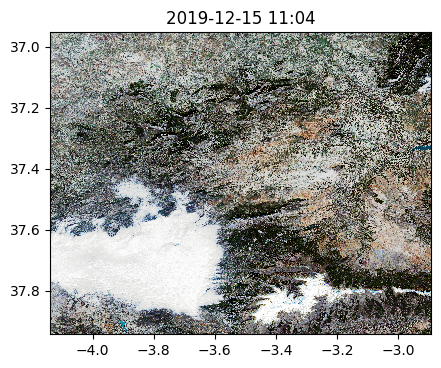

In [9]:
rgb = dp.image(dp.open_rgb_bands(l1.name))

### NBR
The Normalized Burnt index (NBR) uses 2 IR channels: 865 nm (NIR) and 1610 nm (SWIR). This is a remote sensing based spectral rationing technique which helps to monitor changes in the water content of leaves (i.e. vegetation moisture stress assessment).

\begin{equation*}
\text{NBR}=\frac{\text{NIR}-\text{SWIR}}{\text{NIR}+\text{SWIR}}=\,\frac{\text{B08}-\text{B12}}{\text{B08}+\text{B12}}
\end{equation*}

NBR ranges -1 to 1 values each corresponding to a specific moisture level of the terrain.

In this tutorial the NBR index is computed on the eastern areas of Australia, where forests placed between Ulladulla and Batemans Bay, following the costline, was hit by several fires during December 2019. 🔥

In [4]:
products = dp.products("list_remote.txt")[0:3] # load products from your list
nbr = dp.nbr(products) 

:Layout
   .Image.I   :Image   [x,y]   (z)
   .Image.II  :Image   [x,y]   (z)
   .Image.III :Image   [x,y]   (z)
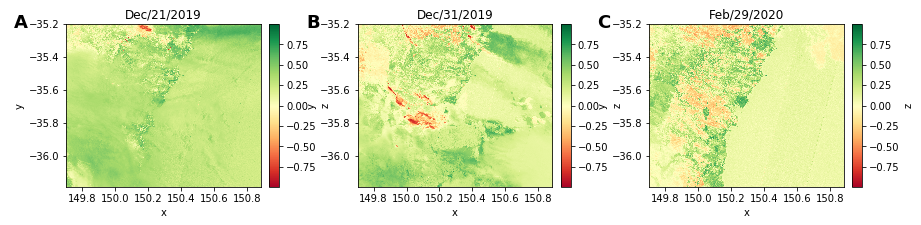

In [5]:
images = dp.plot(nbr,dp.dates(products),dp.bounds()) # needs the dataset, the products and the coordinates dumped in polygon.json
images[0]+images[1]+images[2] # add more images to plot!

The plot below shows the mean values of the NBR index over the tile in the timeseries. The more the fires, lower the NBR index is expected to be, meaning that there is a lower moisture level in the vegetation.

,min,max,mean
Dec/21/2019,-0.891253,0.915822,0.305394
Dec/31/2019,-0.938903,0.999149,0.197204
Feb/29/2020,-0.994186,0.998558,0.111528


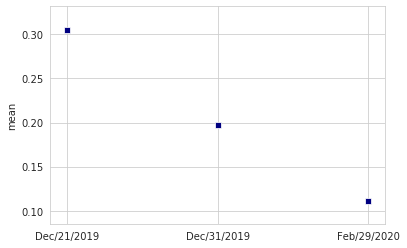

In [5]:
data = dp.analysis(products,nbr) # visualise a timeseries of the mean value of nbr 

# False color image to detect waterbodies

Due to the almost complete absorption of solar radiation in the middle IR range by water, snow, and ice, coastlines and water objects are well distinguished. In a false color image bands B12, B11 and B05 are stacked as an RGB and equalised in the same way. Flooded areas and water appear as dark blue or almost black, while snow coverage appears as red so it is well discernable from other features.

In [10]:
mission,button,l2 = dp.choose(dp.products("list_remote.txt"))
def inputs(b):
    l2.name = mission.value
    print("%s"%(l2.name))
button.on_click(inputs)

Dropdown(description='Product:', layout=Layout(width='95%'), options=('/mnt/Copernicus/OPTICAL/LEVEL-2A/2019/1…

Button(description='CLICK to submit', style=ButtonStyle())

Files opened:

/mnt/Copernicus/OPTICAL/LEVEL-2A/2019/12/15/S2A_MSIL2A_20191215T110441_N0213_R094_T30SVG_20191215T122756.zip/S2A_MSIL2A_20191215T110441_N0213_R094_T30SVG_20191215T122756.SAFE/GRANULE/L2A_T30SVG_A023400_20191215T110444/IMG_DATA/R20m/T30SVG_20191215T110441_B12_20m.jp2

/mnt/Copernicus/OPTICAL/LEVEL-2A/2019/12/15/S2A_MSIL2A_20191215T110441_N0213_R094_T30SVG_20191215T122756.zip/S2A_MSIL2A_20191215T110441_N0213_R094_T30SVG_20191215T122756.SAFE/GRANULE/L2A_T30SVG_A023400_20191215T110444/IMG_DATA/R20m/T30SVG_20191215T110441_B11_20m.jp2

/mnt/Copernicus/OPTICAL/LEVEL-2A/2019/12/15/S2A_MSIL2A_20191215T110441_N0213_R094_T30SVG_20191215T122756.zip/S2A_MSIL2A_20191215T110441_N0213_R094_T30SVG_20191215T122756.SAFE/GRANULE/L2A_T30SVG_A023400_20191215T110444/IMG_DATA/R20m/T30SVG_20191215T110441_B05_20m.jp2




	Dump coordinates as polygon.json
- Creating RGB stack
- Equalizing
- Plotting...


<Figure size 432x288 with 0 Axes>

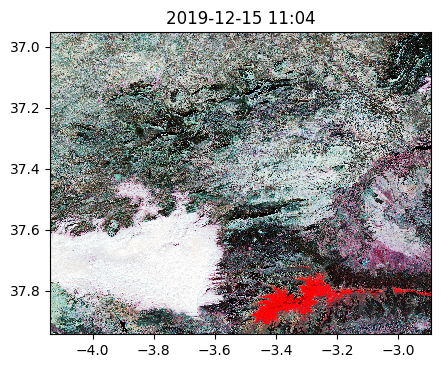

In [7]:
rgb_snow = dp.image(dp.open_rgb_snow(l2.name))

## NDSI
NDSI is a measure of the relative magnitude of the reflectance difference between visible (green) and shortwave infrared (SWIR). It controls variance of two bands (one in the near infrared or short-wave infrared and another one in the visible parts of the spectrum). This is useful for snow mapping. Snow is not only very reflective in the visible parts of the electromagnetic spectrum but also highly absorptive in the NIR or the short-wave infrared part of the spectrum, while the most cloud reflectance remains to be high in the same parts of the spectrum, this allows good separation of most clouds and snow.❄️

To calculate the ratio of the two bands taken and composed in a satellite image in a specific time and location

\begin{equation*}
\text{NDSI}=\frac{\text{G}-\text{SWIR}}{\text{G}+\text{SWIR}}=\,\frac{\text{B03}-\text{B11}}{\text{B03}+\text{B11}}
\end{equation*}

⚠️**Note** that _L1C_ are not suited to this computation, unless rehaping bands <font color="blue">blue</font> <font color="green">green</font> <font color="red"> red </font> on the longer wavelengths.

In [8]:
products = dp.products("list_remote.txt")[3:] # load products from the selected list
ndsi = dp.ndsi(products)

:Layout
   .Image.I  :Image   [x,y]   (z)
   .Image.II :Image   [x,y]   (z)
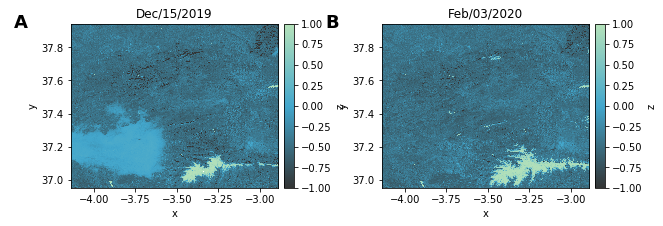

In [9]:
images = dp.plot_snow(ndsi,dp.dates(products),dp.bounds()) # needs the dataset, the products and the coordinates dumped in polygon.json
images[0]+images[1]